### Objective 
We implement a bigram character-level language model, which we will further complexify in followup videos into a modern Transformer language model, like GPT. 

### Take away 
- Makemore is a character level language model. A character level language model it's just sort of modeling those sequences of characters and it knows how to predict the next character in the sequence.
- Biagram language model we work with two character at the time.
- Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain. Good [article](https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036) to read. Another good [article](https://aws.amazon.com/fr/what-is/overfitting/) to read

In [44]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
type(words)


list

In [3]:
max([len(w) for w in words])

15

In [4]:
b = {}
for w in words:
    ches = ['<S>']+list(w)+['<E>']
    for ch1,ch2 in zip(ches,ches[1:]):
        biagram = (ch1,ch2)
        b[biagram] = b.get(biagram,0)+1
        

In [5]:
l = reversed(sorted(b.items(), key = lambda kv : kv[1]))
list(l)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
N = torch.zeros([27,27],dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

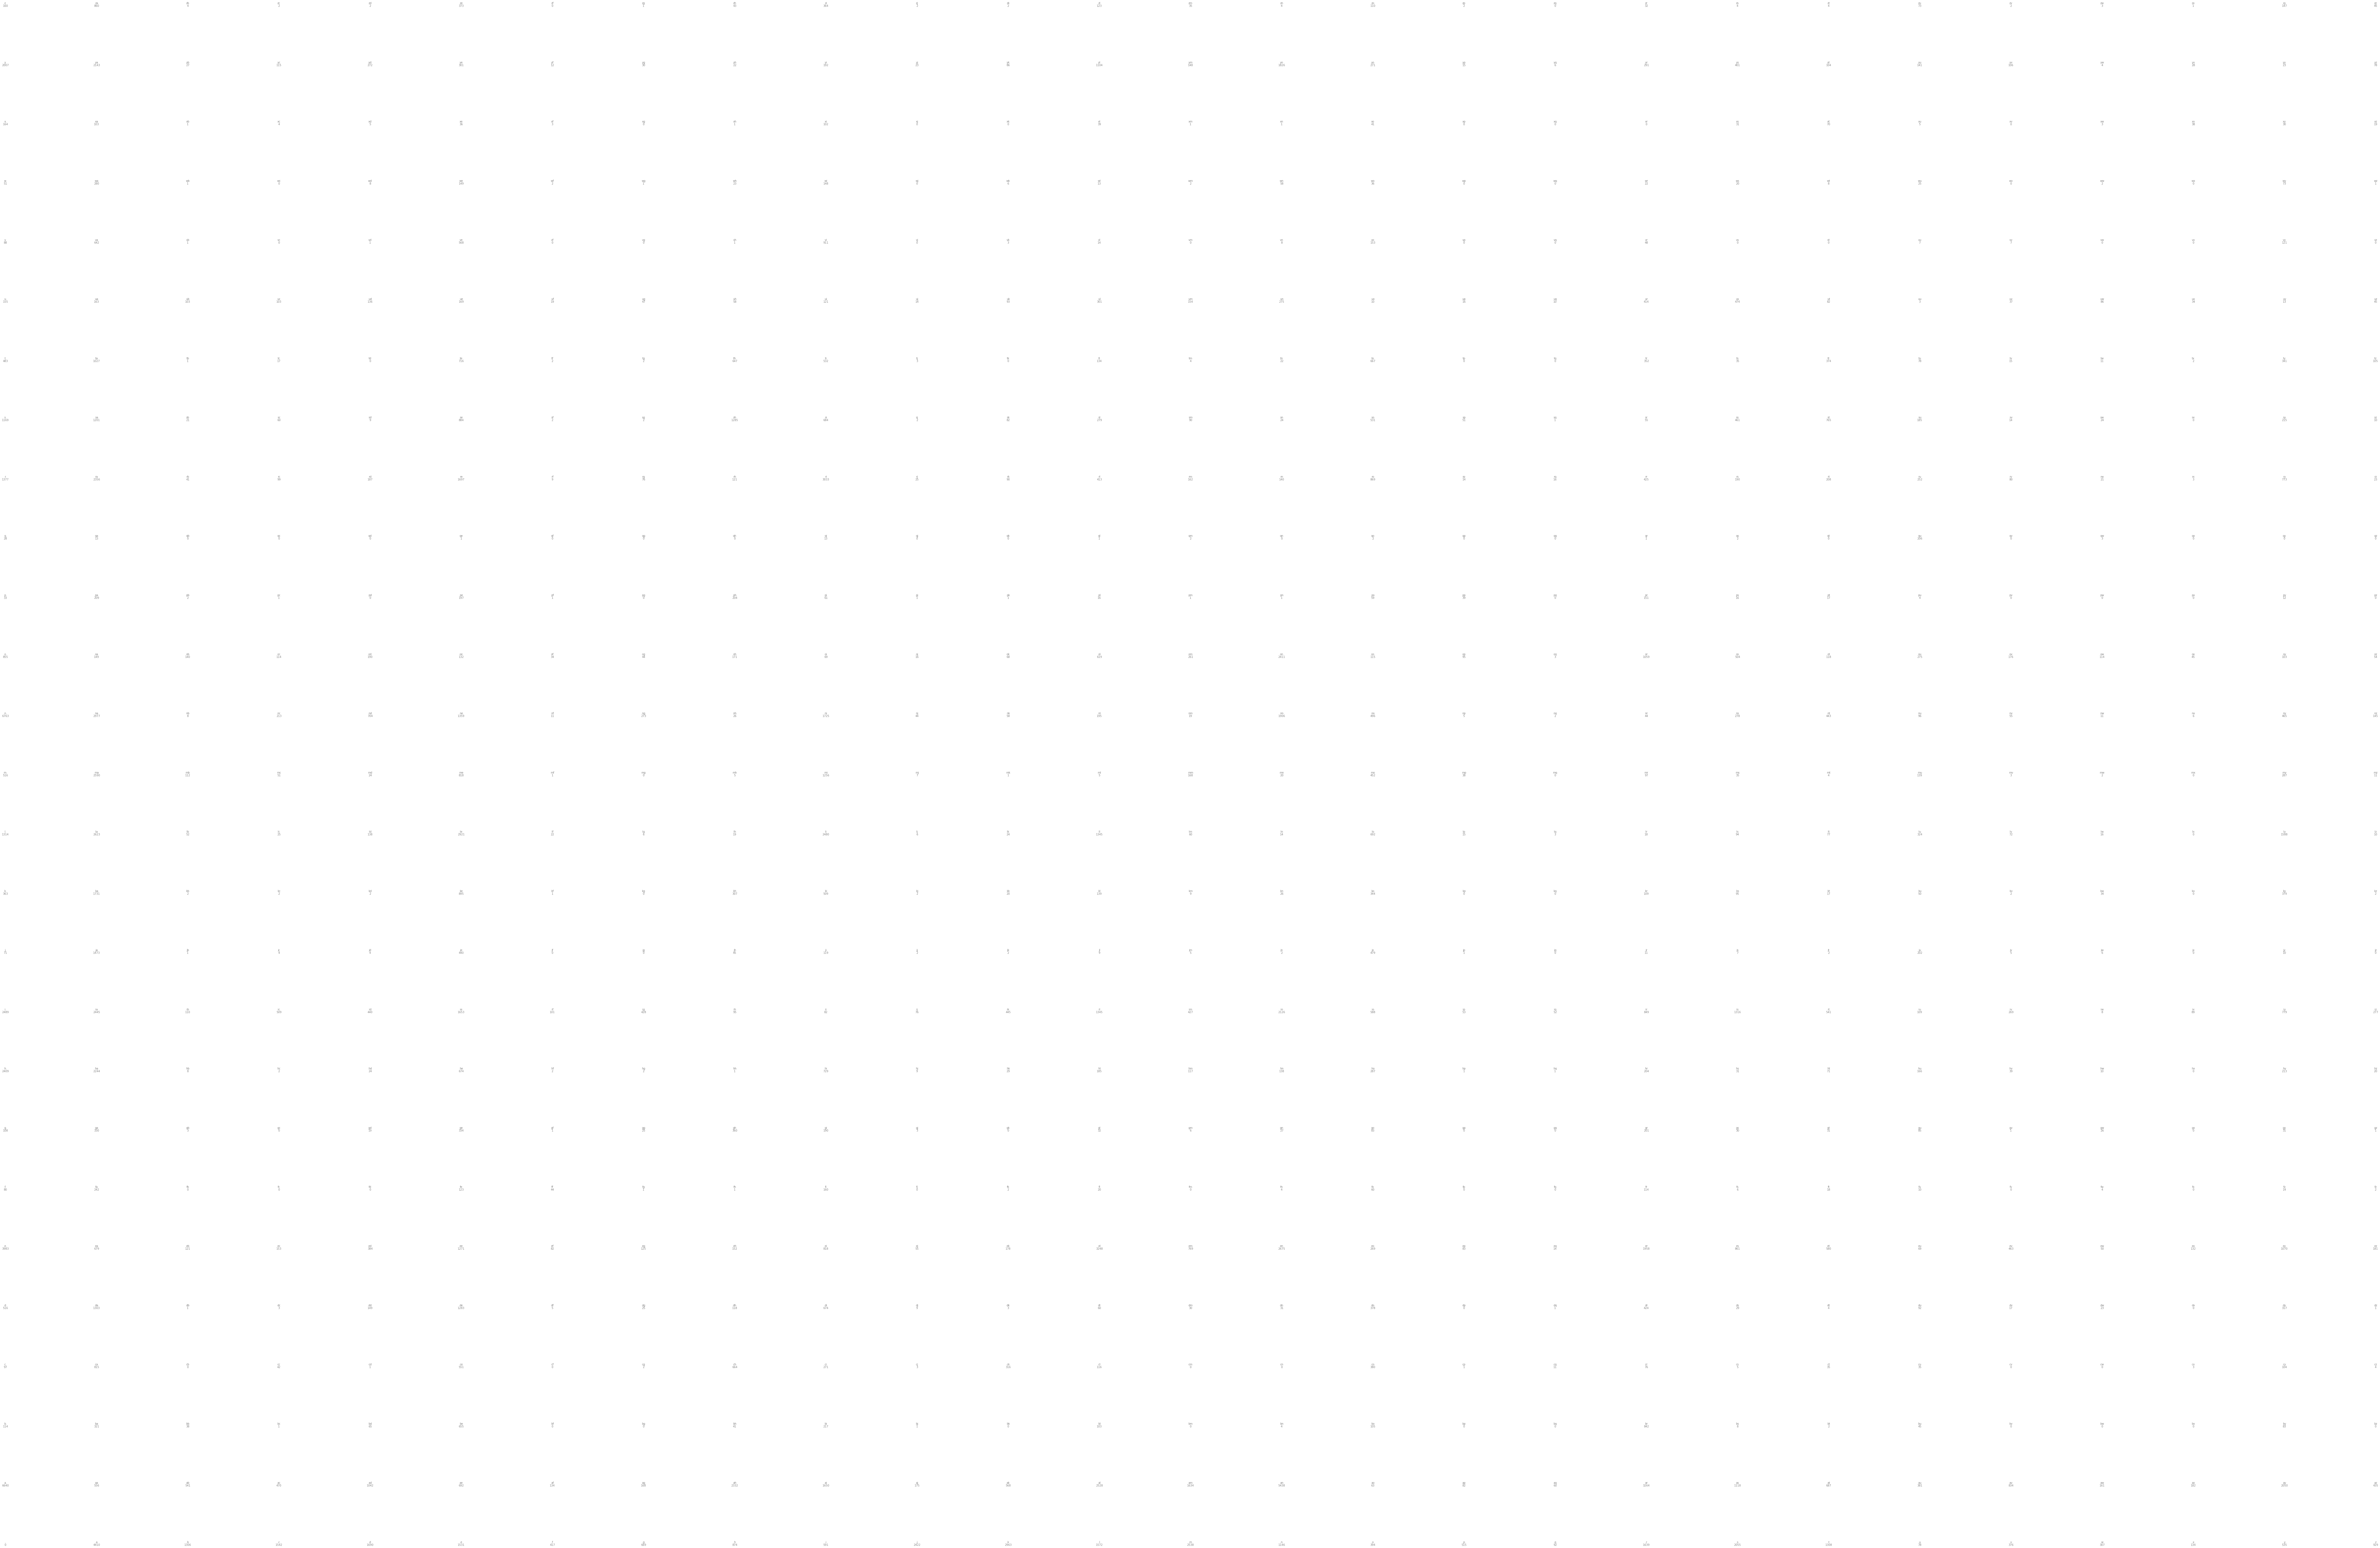

In [8]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [9]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [10]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
itos[ix]

'm'

We can consider this as the learning phase. <br/>
Take a way: important to understand the tensors [brodcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

In [12]:
P = N.float()
P.sum(1, keepdim=True)
P = (N+1).float()
P /= P.sum(1, keepdims=True) # possibly thank to tensor brodcasting



We sample from the model 

In [13]:


g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))



mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


Evaluation of the quality of the model using the negative log likelihood :

- GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling) 
- Equivalent to maximizing the log likelihood 
- Equivalent to minimizing the negative log likelihood
- Equivalent to minimizing the average negative log likelihood


In [14]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
  
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


The neural approach: 
- Create the training set 
- Learning phase

In [23]:

xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)



In [25]:
xs

tensor([ 0,  5, 13, 13,  1])

In [26]:
ys

tensor([ 5, 13, 13,  1,  0])

In [46]:
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
xenc.shape

torch.Size([5, 27])

In [53]:
W = torch.randn((27, 27))
xenc @ W


tensor([[-0.2100, -0.1410, -1.5979,  0.6213,  0.2734, -0.6893, -0.9041, -0.2626,
          0.6242,  0.9508,  1.5941, -0.4346, -0.4178, -0.6657, -2.7430, -0.8031,
         -0.7817,  0.8009, -0.1355,  0.5079, -0.6303, -1.4283, -3.1454, -0.3113,
         -1.0431, -1.6249, -0.2022],
        [-0.3073, -1.5069,  0.3871,  0.5008,  1.3628, -0.1033, -0.2859, -0.6736,
         -1.3601,  1.1343, -1.3362,  1.3318,  0.9073, -0.4578,  0.4904, -0.1244,
          2.4909, -1.6815,  2.3165,  0.4863,  0.2014,  0.5907, -0.7029, -0.1367,
         -0.1195,  0.6734, -0.1105],
        [ 0.0624,  0.4517, -0.4972, -0.9268, -0.0702, -0.5751,  1.5313,  0.6632,
         -0.6401,  0.5412,  0.0055, -0.8884, -0.6293,  0.2983,  0.5286,  0.5480,
         -0.0378, -0.3934, -0.0485, -1.8355,  0.2021,  0.4848, -0.6563,  0.7624,
          0.2256, -0.0463,  0.6824],
        [ 0.0624,  0.4517, -0.4972, -0.9268, -0.0702, -0.5751,  1.5313,  0.6632,
         -0.6401,  0.5412,  0.0055, -0.8884, -0.6293,  0.2983,  0.5286,  0.5480

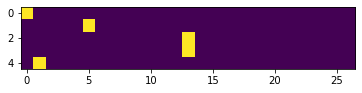

In [54]:
plt.imshow(xenc)

In [55]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0305, 0.0327, 0.0076, 0.0700, 0.0495, 0.0189, 0.0152, 0.0289, 0.0702,
         0.0974, 0.1853, 0.0244, 0.0248, 0.0193, 0.0024, 0.0169, 0.0172, 0.0838,
         0.0329, 0.0625, 0.0200, 0.0090, 0.0016, 0.0276, 0.0133, 0.0074, 0.0307],
        [0.0133, 0.0040, 0.0266, 0.0298, 0.0706, 0.0163, 0.0136, 0.0092, 0.0046,
         0.0562, 0.0047, 0.0684, 0.0448, 0.0114, 0.0295, 0.0160, 0.2181, 0.0034,
         0.1832, 0.0294, 0.0221, 0.0326, 0.0089, 0.0158, 0.0160, 0.0354, 0.0162],
        [0.0321, 0.0474, 0.0184, 0.0120, 0.0281, 0.0170, 0.1396, 0.0586, 0.0159,
         0.0519, 0.0304, 0.0124, 0.0161, 0.0407, 0.0512, 0.0522, 0.0291, 0.0204,
         0.0288, 0.0048, 0.0370, 0.0490, 0.0157, 0.0647, 0.0378, 0.0288, 0.0598],
        [0.0321, 0.0474, 0.0184, 0.0120, 0.0281, 0.0170, 0.1396, 0.0586, 0.0159,
         0.0519, 0.0304, 0.0124, 0.0161, 0.0407, 0.0512, 0.0522, 0.0291, 0.0204,
         0.0288, 0.0048, 0.0370, 0.0490, 0.0157, 0.0647, 0.0378, 0.0288, 0.0598],
        [0.0359, 0.0546,

In [56]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0305, 0.0327, 0.0076, 0.0700, 0.0495, 0.0189, 0.0152, 0.0289, 0.0702,
         0.0974, 0.1853, 0.0244, 0.0248, 0.0193, 0.0024, 0.0169, 0.0172, 0.0838,
         0.0329, 0.0625, 0.0200, 0.0090, 0.0016, 0.0276, 0.0133, 0.0074, 0.0307],
        [0.0133, 0.0040, 0.0266, 0.0298, 0.0706, 0.0163, 0.0136, 0.0092, 0.0046,
         0.0562, 0.0047, 0.0684, 0.0448, 0.0114, 0.0295, 0.0160, 0.2181, 0.0034,
         0.1832, 0.0294, 0.0221, 0.0326, 0.0089, 0.0158, 0.0160, 0.0354, 0.0162],
        [0.0321, 0.0474, 0.0184, 0.0120, 0.0281, 0.0170, 0.1396, 0.0586, 0.0159,
         0.0519, 0.0304, 0.0124, 0.0161, 0.0407, 0.0512, 0.0522, 0.0291, 0.0204,
         0.0288, 0.0048, 0.0370, 0.0490, 0.0157, 0.0647, 0.0378, 0.0288, 0.0598],
        [0.0321, 0.0474, 0.0184, 0.0120, 0.0281, 0.0170, 0.1396, 0.0586, 0.0159,
         0.0519, 0.0304, 0.0124, 0.0161, 0.0407, 0.0512, 0.0522, 0.0291, 0.0204,
         0.0288, 0.0048, 0.0370, 0.0490, 0.0157, 0.0647, 0.0378, 0.0288, 0.0598],
        [0.0359, 0.0546,

In [57]:
probs[0]

tensor([0.0305, 0.0327, 0.0076, 0.0700, 0.0495, 0.0189, 0.0152, 0.0289, 0.0702,
        0.0974, 0.1853, 0.0244, 0.0248, 0.0193, 0.0024, 0.0169, 0.0172, 0.0838,
        0.0329, 0.0625, 0.0200, 0.0090, 0.0016, 0.0276, 0.0133, 0.0074, 0.0307])

In [58]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [59]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [60]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [61]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())



--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [63]:


# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)



number of examples:  228146


In [65]:


# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad



3.378807306289673


In [66]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.161090850830078


In [67]:


# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))



ousbbwxckpolyrswzrhuchuinn.
jucdc.
omiwmpzerli.
rabtin.
jblhbujbmalronbun.
